# Dataset gaji-karyawan

## Import numpy, pandas, matplotlib, dan scikit-learn

In [1]:
import numpy as np # numpy
import pandas as pd # pandas
import matplotlib.pyplot as plt # matplotlib
import sklearn # scikit-learn

## Pendefinisian Masalah Gaji

Bagaimana menentukan **berapa gaji terbaik yang harus diberikan kepada kandidat karyawan baru yang memiliki pengalaman bekerja selama 10 tahun?**

## Persiapan Data Gaji

In [2]:
df_gaji = pd.read_csv('../csv/gaji-karyawan/salary_data.csv')
df_gaji

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


### Melihat Persebaran Data

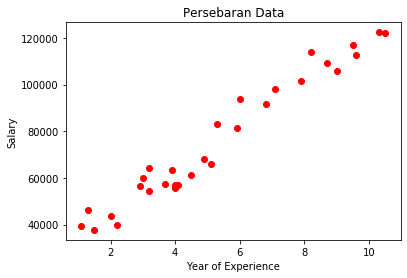

In [3]:
x = df_gaji.iloc[:, :-1] # x berisisi kolom YearExperience
y = df_gaji.iloc[:, 1:] # y berisi kolom Salary

# plt adalah alias untuk pyplot
plt.scatter(x, y, color='red')
plt.title('Persebaran Data')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

### Melihat *shape* dataset

In [4]:
df_gaji.shape

(30, 2)

### Melihat Lima Baris Teratas

In [5]:
df_gaji.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### Memperoleh Deskripsi Singkat dari Dataset

In [6]:
df_gaji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
df_gaji.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Melatih Model Gaji

### Training

In [8]:
# import train_test_split dari sklearn.model_selection
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [9]:
# Import LinearRegression dari sklearn.linear_model
from sklearn.linear_model import LinearRegression

# masukkan fungsi LinearRegression ke dalam variabel regressor
regressor = LinearRegression()

# gunakan training data untuk membuat model
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predict

### Cek Linieritas Prediksi Model Menggunakan Training, Test, dan Data Asli

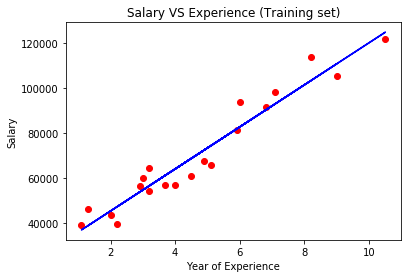

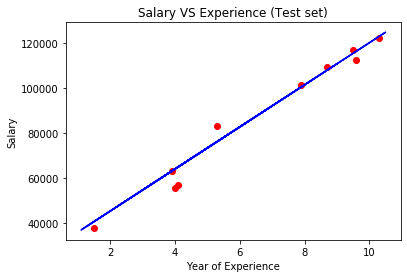

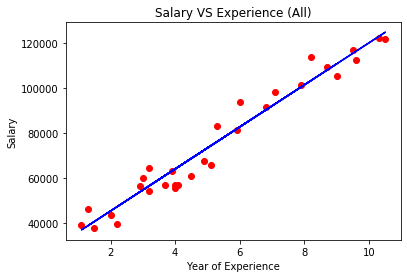

In [10]:
# Hasil Visualisasi Training Data

plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary VS Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

# Hasil Visualisasi Testing Data

plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary VS Experience (Test set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

# Hasil Visualisasi Semua Data

plt.scatter(x, y, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary VS Experience (All)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

### Prediksi Gaji Pengalaman 10 Tahun

In [11]:
# Prediksi gaji kandidat karyawan baru yg memiliki 10 tahun pengalaman kerja
y_pred = regressor.predict([[10]])

print('Gaji tertinggi yang bisa diberikan adalah $', int(y_pred))

Gaji tertinggi yang bisa diberikan adalah $ 120275


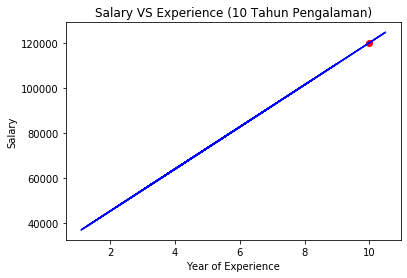

In [12]:
y_pred = regressor.predict([[10]])

# Hasil Visualisasi Gaji dengan Pengalaman 10 Tahun

plt.scatter(10, y_pred, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary VS Experience (10 Tahun Pengalaman)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [48]:
# Prediksi gaji berdasarkan x_test
y_pred = regressor.predict(x_test)

# membuat dataframe untuk y_test dan y_pred
df1 = pd.DataFrame(y_test).reset_index(drop=True)
df2 = pd.DataFrame(y_pred.astype(int), columns=['Predicted Salary']).reset_index(drop=True)

df1.join(df2)

,Salary,Predicted Salary
0,37731,40835
1,122391,123079
2,57081,65134
3,63218,63265
4,116969,115602
5,109431,108125
6,112635,116537
7,55794,64199
8,83088,76349
9,101302,100649


## Menguji Akurasi Model Gaji

In [46]:
# masukan model yang menggunakan training data ke dalam variabel
model = regressor.fit(x_train, y_train)

# tampilkan nilai score dari model yang menggunakan test data
print('Score dari model adalah', model.score(x_test,y_test))

Score dari model adalah 0.9749154407708353


## Memasukkan Nilai Asli Ke Model

In [49]:
# Prediksi gaji berdasarkan x
y_pred = regressor.predict(x)

# membuat dataframe untuk df_gaji dan y_pred
df1 = pd.DataFrame(df_gaji).reset_index(drop=True)
df2 = pd.DataFrame(y_pred.astype(int), columns=['Predicted Salary']).reset_index(drop=True)

df1.join(df2)

,YearsExperience,Salary,Predicted Salary
0,1.1,39343,37096
1,1.3,46205,38965
2,1.5,37731,40835
3,2.0,43525,45508
4,2.2,39891,47377
5,2.9,56642,53919
6,3.0,60150,54854
7,3.2,54445,56723
8,3.2,64445,56723
9,3.7,57189,61396


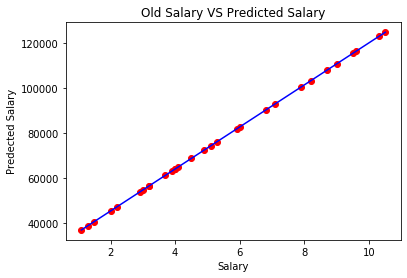

In [47]:
# Hasil Visualisasi Gaji dengan Pengalaman yang ada di Perusahaan ABC Menggunakan Test Data

plt.scatter(x, y_pred, color='r')
plt.plot(x, y_pred, color='b')
plt.title('Old Salary VS Predicted Salary')
plt.xlabel('Salary')
plt.ylabel('Predected Salary')
plt.show()